In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.impute import *

In [83]:
# importing classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [84]:
data= pd.read_csv('/content/heart-disease-cleaned.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


In [85]:
data.shape

(297, 14)

In [86]:
data.dtypes

,0
age,float64
sex,float64
cp,float64
trestbps,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


In [87]:
y=data['diagnosis']
y

,diagnosis
0,0
1,1
2,1
3,0
4,0
...,...
292,1
293,1
294,1
295,1


In [88]:
y.value_counts()

,count
diagnosis,
0,160
1,137


In [89]:
x= data.drop(['diagnosis'],axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [90]:
col_names= list(data.columns)
col_names

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'diagnosis']

In [91]:
# Check for missing entries
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [92]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=20)
# We usually use 80:20 split ratio.
# Use random state to reproduce same split.

The task is a classification problem because the goal is to predict a discrete, categorical outcome: the diagnosis variable, which is binary (0 = no heart disease, 1 = heart disease).

In [93]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
198,64.0,0.0,4.0,180.0,325.0,0.0,0.0,154.0,1.0,0.0,1.0,0.0,3.0
112,43.0,0.0,4.0,132.0,341.0,1.0,2.0,136.0,1.0,3.0,2.0,0.0,7.0
228,55.0,0.0,4.0,180.0,327.0,0.0,1.0,117.0,1.0,3.4,2.0,0.0,3.0
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0
245,52.0,1.0,4.0,125.0,212.0,0.0,0.0,168.0,0.0,1.0,1.0,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,67.0,1.0,4.0,125.0,254.0,1.0,0.0,163.0,0.0,0.2,2.0,2.0,7.0
278,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0
218,54.0,0.0,3.0,108.0,267.0,0.0,2.0,167.0,0.0,0.0,1.0,0.0,3.0
223,47.0,1.0,4.0,112.0,204.0,0.0,0.0,143.0,0.0,0.1,1.0,0.0,3.0


In [94]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
208,38.0,1.0,1.0,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,0.0,7.0
240,61.0,1.0,1.0,134.0,234.0,0.0,0.0,145.0,0.0,2.6,2.0,2.0,3.0
90,62.0,0.0,4.0,160.0,164.0,0.0,2.0,145.0,0.0,6.2,3.0,3.0,7.0
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
275,58.0,0.0,4.0,130.0,197.0,0.0,0.0,131.0,0.0,0.6,2.0,0.0,3.0
28,43.0,1.0,4.0,150.0,247.0,0.0,0.0,171.0,0.0,1.5,1.0,0.0,3.0
150,42.0,0.0,4.0,102.0,265.0,0.0,2.0,122.0,0.0,0.6,2.0,0.0,3.0
205,55.0,1.0,2.0,130.0,262.0,0.0,0.0,155.0,0.0,0.0,1.0,0.0,3.0
242,67.0,1.0,4.0,120.0,237.0,0.0,0.0,71.0,0.0,1.0,2.0,0.0,3.0
224,67.0,0.0,3.0,152.0,277.0,0.0,0.0,172.0,0.0,0.0,1.0,1.0,3.0


In [95]:
column_names= x.columns.values
column_names

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

<Axes: >

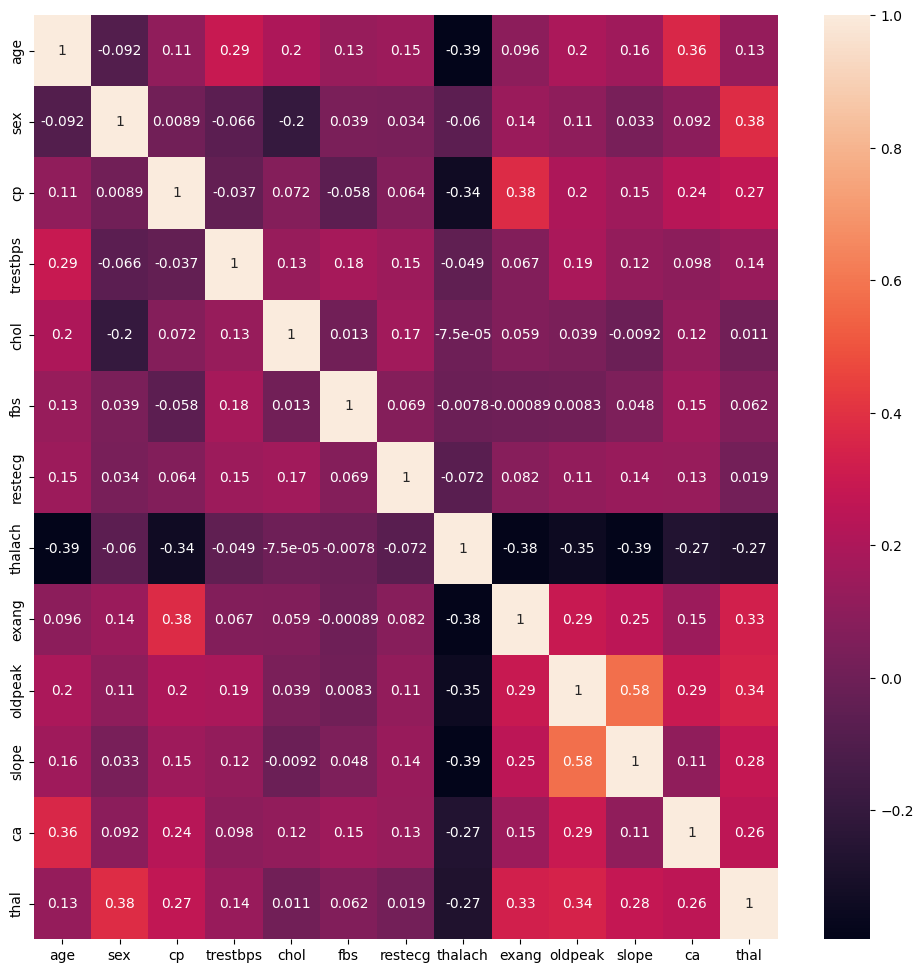

In [96]:
plt.figure(figsize=(12,12))
sns.heatmap(x.corr(), annot=True)

In [97]:
sc= StandardScaler()
# define the scaler object

In [98]:
sc.fit(x_train)
# calculates z-score to normalize each feature variable

StandardScaler()

In [99]:
x_train_sc= sc.fit_transform(x_train)
x_train_sc

array([[ 1.03688796, -1.40089257,  0.87221096, ..., -0.95452086,
        -0.70490154, -0.8869743 ],
       [-1.24655955, -1.40089257,  0.87221096, ...,  0.67297154,
        -0.70490154,  1.16889768],
       [ 0.0582676 , -1.40089257,  0.87221096, ...,  0.67297154,
        -0.70490154, -0.8869743 ],
       ...,
       [-0.050468  , -1.40089257, -0.17709867, ..., -0.95452086,
        -0.70490154, -0.8869743 ],
       [-0.81161717,  0.71383061,  0.87221096, ..., -0.95452086,
        -0.70490154, -0.8869743 ],
       [ 1.03688796,  0.71383061, -2.27571792, ...,  0.67297154,
        -0.70490154,  1.16889768]])

In [100]:
x_test_sc= sc.transform(x_test)
x_test_sc

array([[-1.79023752e+00,  7.13830610e-01, -2.27571792e+00,
        -6.32629479e-01, -3.13800850e-01, -4.09252593e-01,
        -1.02139682e+00,  1.43351030e+00,  1.46969385e+00,
         2.44502779e+00,  6.72971538e-01, -7.04901539e-01,
         1.16889768e+00],
       [ 7.10681170e-01,  7.13830610e-01, -2.27571792e+00,
         1.40506658e-01, -2.58272626e-01, -4.09252593e-01,
        -1.02139682e+00, -2.22893945e-01, -6.80413817e-01,
         1.38824071e+00,  6.72971538e-01,  1.52258732e+00,
        -8.86974304e-01],
       [ 8.19416765e-01, -1.40089257e+00,  8.72210955e-01,
         1.57633091e+00, -1.55393119e+00, -4.09252593e-01,
         9.95861901e-01, -2.22893945e-01, -6.80413817e-01,
         4.55860197e+00,  2.30046393e+00,  2.63633176e+00,
         1.16889768e+00],
       [ 2.75738788e-01, -1.40089257e+00,  8.72210955e-01,
         4.71850716e-01, -1.28706770e-01, -4.09252593e-01,
        -1.02139682e+00, -1.20778296e+00,  1.46969385e+00,
        -7.25333473e-01,  6.72971538e

In [101]:
x_train_2= pd.DataFrame(x_train_sc, columns=column_names)
x_train_2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.036888,-1.400893,0.872211,2.680811,1.426084,-0.409253,-1.021397,0.180015,1.469694,-0.901465,-0.954521,-0.704902,-0.886974
1,-1.246560,-1.400893,0.872211,0.030059,1.722234,2.443479,0.995862,-0.625803,1.469694,1.740503,0.672972,-0.704902,1.168898
2,0.058268,-1.400893,0.872211,2.680811,1.463102,-0.409253,-0.012767,-1.476389,1.469694,2.092765,0.672972,-0.704902,-0.886974
3,0.275739,-1.400893,0.872211,-0.632629,1.962856,-0.409253,-1.021397,0.582924,1.469694,-0.373071,-0.954521,-0.704902,-0.886974
4,-0.267939,0.713831,0.872211,-0.356509,-0.665480,-0.409253,-1.021397,0.806763,-0.680414,-0.020809,-0.954521,1.522587,1.168898
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,1.363095,0.713831,0.872211,-0.356509,0.111916,2.443479,-1.021397,0.582924,-0.680414,-0.725333,0.672972,1.522587,1.168898
233,0.058268,-1.400893,0.872211,-0.190837,-0.795045,-0.409253,-0.012767,-0.894409,1.469694,0.859847,0.672972,0.408843,1.168898
234,-0.050468,-1.400893,-0.177099,-1.295318,0.352538,-0.409253,0.995862,0.761995,-0.680414,-0.901465,-0.954521,-0.704902,-0.886974
235,-0.811617,0.713831,0.872211,-1.074422,-0.813555,-0.409253,-1.021397,-0.312429,-0.680414,-0.813399,-0.954521,-0.704902,-0.886974


In [102]:
x_test_2= pd.DataFrame(x_test_sc, columns=column_names)
x_test_2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.790238,0.713831,-2.275718,-0.632629,-0.313801,-0.409253,-1.021397,1.433510,1.469694,2.445028,0.672972,-0.704902,1.168898
1,0.710681,0.713831,-2.275718,0.140507,-0.258273,-0.409253,-1.021397,-0.222894,-0.680414,1.388241,0.672972,1.522587,-0.886974
2,0.819417,-1.400893,0.872211,1.576331,-1.553931,-0.409253,0.995862,-0.222894,-0.680414,4.558602,2.300464,2.636332,1.168898
3,0.275739,-1.400893,0.872211,0.471851,-0.128707,-0.409253,-1.021397,-1.207783,1.469694,-0.725333,0.672972,-0.704902,1.168898
4,0.384474,-1.400893,0.872211,-0.080389,-0.943121,-0.409253,-1.021397,-0.849641,-0.680414,-0.373071,0.672972,-0.704902,-0.886974
5,-1.246560,0.713831,0.872211,1.024091,-0.017650,-0.409253,-1.021397,0.941066,-0.680414,0.419519,-0.954521,-0.704902,-0.886974
6,-1.355295,-1.400893,0.872211,-1.626662,0.315519,-0.409253,0.995862,-1.252551,-0.680414,-0.373071,0.672972,-0.704902,-0.886974
7,0.058268,0.713831,-1.226408,-0.080389,0.259991,-0.409253,-1.021397,0.224783,-0.680414,-0.901465,-0.954521,-0.704902,-0.886974
8,1.363095,0.713831,0.872211,-0.632629,-0.202744,-0.409253,-1.021397,-3.535702,-0.680414,-0.020809,0.672972,-0.704902,-0.886974
9,1.363095,-1.400893,-0.177099,1.134539,0.537632,-0.409253,-1.021397,0.985833,-0.680414,-0.901465,-0.954521,0.408843,-0.886974


In [103]:
# define classifier objects

knn= KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
lr = LogisticRegression()
dt= DecisionTreeClassifier(random_state=20)
svm = SVC()

In [104]:
# fit the classifier object on the train data
knn.fit(x_train_2, y_train)

KNeighborsClassifier(n_jobs=-1)

In [105]:
knn.score(x_train_2, y_train)
# The score function provides the accuracy

0.8649789029535865

In [106]:
knn.score(x_test_2, y_test)

0.85

In [107]:
lr.fit(x_train_2, y_train)
print('training:', lr.score(x_train_2, y_train))
print('testing:', lr.score(x_test_2, y_test))

training: 0.8481012658227848
testing: 0.8333333333333334


In [108]:
dt.fit(x_train_2, y_train)
print('training:', dt.score(x_train_2, y_train))
print('testing:', dt.score(x_test_2, y_test))

training: 1.0
testing: 0.7166666666666667


In [109]:
svm.fit(x_train_2, y_train)
print('training:', svm.score(x_train_2, y_train))
print('testing:', svm.score(x_test_2, y_test))

training: 0.890295358649789
testing: 0.8333333333333334


##Using Pipeline
no null value so imputation


In [110]:
from sklearn.pipeline import Pipeline

In [111]:
pipe = Pipeline([('scaler', StandardScaler()), ('lr', lr)])

##Using Cross-validation

In [112]:
result= cross_validate(pipe, x,y, cv = 10)



In [113]:
res= pd.DataFrame(result)
res

,fit_time,score_time,test_score
0,0.017181,0.007234,0.866667
1,0.016898,0.007492,0.866667
2,0.017870,0.007671,0.766667
3,0.009916,0.004415,0.966667
4,0.016269,0.004000,0.800000
5,0.014427,0.004121,0.766667
6,0.009787,0.003831,0.766667
7,0.011076,0.003838,0.896552
8,0.009286,0.004901,0.724138
9,0.016660,0.004044,0.862069


In [114]:
res.mean(axis=0)

,0
fit_time,0.013937
score_time,0.005155
test_score,0.828276


##Making predictions

In [115]:
x_test_2.iloc[2]

,2
age,0.819417
sex,-1.400893
cp,0.872211
trestbps,1.576331
chol,-1.553931
fbs,-0.409253
restecg,0.995862
thalach,-0.222894
exang,-0.680414
oldpeak,4.558602


In [116]:
y_test.iloc[2]

1

In [117]:
knn.predict([x_test_2.iloc[2]])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [118]:
print(lr.predict_proba([x_test_2.iloc[2]]))
print (lr.predict([x_test_2.iloc[2]]))

[[0.00228353 0.99771647]]
[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [119]:
print(dt.predict_proba([x_test_2.iloc[2]]))


[[0. 1.]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [120]:
svm.predict([x_test_2.iloc[2]])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])